# Initialisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis
from clustering.utils import *

/content/drive/MyDrive/GitHub/master-thesis


# Preprocessing

In [4]:
beh_cols = get_behaviour_cols()
df_pca_input = get_preprocessed_data(impute=True, impute_cols=beh_cols, start='2020-08-01', end='2021-02-01')

In [5]:
# Train Test Split
end_train = '2020-12-01'
df_pca_input_train = df_pca_input[(df_pca_input.date < end_train)]
max(df_pca_input_train.date)

Timestamp('2020-11-30 00:00:00')

In [9]:
scaler = MinMaxScaler()
pca_input_train = scaler.fit_transform(df_pca_input_train[beh_cols].to_numpy())
pca_input = scaler.fit_transform(df_pca_input[beh_cols].to_numpy())
pca_input.shape

(47010, 30)

In [8]:
pca_input_train = df_pca_input_train[beh_cols].to_numpy()
pca_input = df_pca_input[beh_cols].to_numpy()

array([[6., 6., 1., ..., 3., 7., 7.],
       [2., 5., 1., ..., 1., 2., 1.],
       [4., 4., 7., ..., 6., 7., 7.],
       ...,
       [1., 6., 4., ..., 6., 4., 3.],
       [1., 4., 5., ..., 5., 3., 5.],
       [4., 6., 5., ..., 6., 4., 5.]])

# PCA

In [9]:
pca = PCA(whiten=True)
pca.fit(pca_input_train)
x_pca = pca.transform(pca_input)
df_pca = pd.DataFrame(x_pca)
for column in df_pca.columns:
  df_pca.rename(columns={column: 'PC_'+str(column)}, inplace=True)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29
0,0.425445,-1.705584,1.163342,-0.299562,1.924161,-0.706105,-0.091898,0.450799,1.978448,0.525048,...,-4.398559,-2.239196,-1.858945,0.863648,-1.248005,1.193544,-3.923535,1.754040,0.542875,0.431476
1,2.311745,-0.634158,3.349995,2.018854,0.332872,-0.192037,-0.905594,1.897176,-0.884103,-0.103482,...,0.041047,-0.656608,-0.953271,-0.949322,1.136866,-1.952283,0.997945,-1.011985,1.384634,0.696572
2,-1.068809,-0.884325,-0.561837,0.990646,2.136327,1.483313,0.955209,-0.220279,-0.215531,1.120319,...,-2.310158,1.903889,-1.795715,-0.790475,-0.211730,-0.623274,-1.140741,-0.163174,-0.105275,0.134718
3,-1.260220,0.651651,-1.139644,1.537762,-0.186577,0.383378,-1.701685,-0.580993,1.357235,-1.943988,...,0.099196,0.289379,-0.501970,0.515412,0.208348,-0.196758,0.065785,0.055079,0.017100,-0.012010
4,-1.606484,0.395418,0.930114,-0.670113,0.399845,0.804772,-0.349519,3.154951,0.072741,0.640577,...,0.011180,0.353520,0.081828,0.741635,0.207330,0.089105,0.360491,-0.073950,0.114710,-0.888929


# Evaluate Results

In [26]:
import seaborn as sns
import matplotlib as mpl

In [27]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [22]:
mpl.rcParams.update({'font.size': 20, 'lines.linewidth': 3, 'lines.markersize': 15}) #, 'figure.figsize': (11.7, 8.27)
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
#mpl.rcParams['text.usetex'] = True

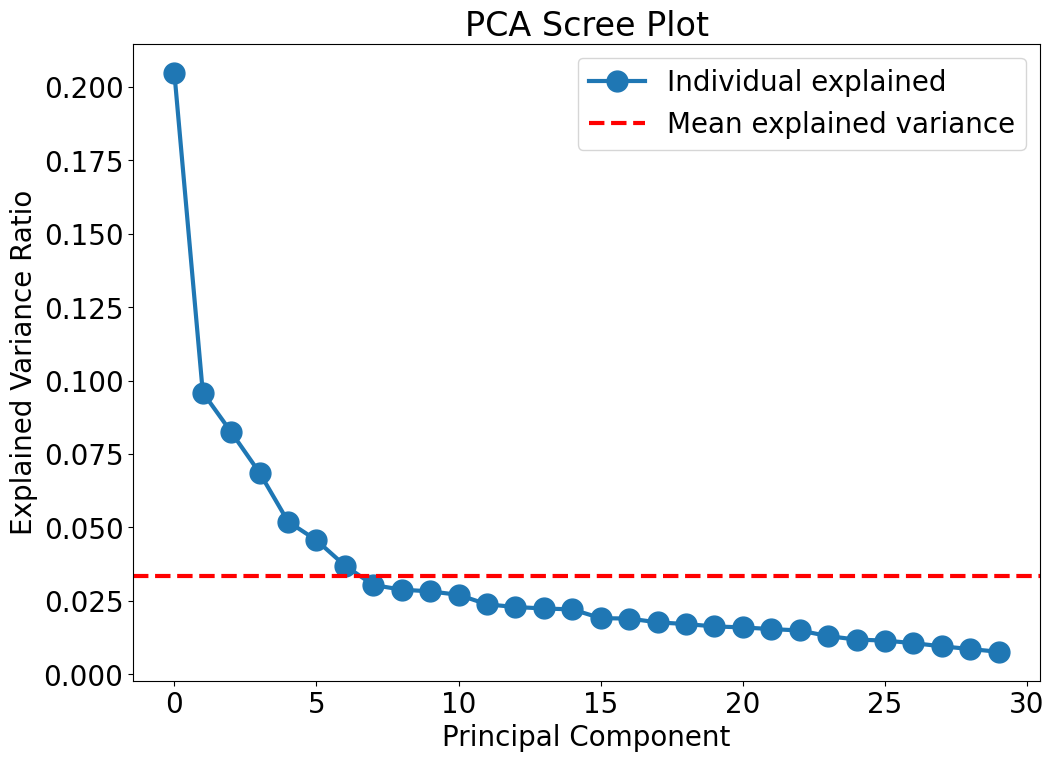

In [13]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#exp_var_pca = exp_var_pca * factor
plt.plot(range(0,len(exp_var_pca)), exp_var_pca, label='Individual explained', marker='o')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.axhline(y=exp_var_pca.mean(), color='r', linestyle='dashed', label='Mean explained variance')
plt.legend(loc='best')
plt.title('PCA Scree Plot')
plt.show()

In [14]:
num_comp_avg = (exp_var_pca > exp_var_pca.mean()).sum()
explained_variance = cum_sum_eigenvalues[num_comp_avg-1]
print(f'{num_comp_avg} Komponenten sind größer als der Durchschnitt und erklären damit {np.round(explained_variance * 100, 2)}% der Varianz in den Daten.')

7 Komponenten sind größer als der Durchschnitt und erklären damit 58.63% der Varianz in den Daten.


In [15]:
num_comp = 5
cum_sum_eigenvalues

array([0.20475925, 0.30069506, 0.38313867, 0.45171016, 0.50369509,
       0.54931451, 0.58631118, 0.61669572, 0.64550738, 0.67373051,
       0.70077952, 0.72458185, 0.74747841, 0.76988021, 0.79196409,
       0.81107181, 0.83003848, 0.84771088, 0.86481493, 0.88110698,
       0.89706202, 0.91245099, 0.92736069, 0.9403552 , 0.95216358,
       0.9636354 , 0.97423657, 0.98375594, 0.99234016, 1.        ])

Die Dimensionen sollen soweit reduziert werden, dass noch 80% der Varianz benötigt werden.

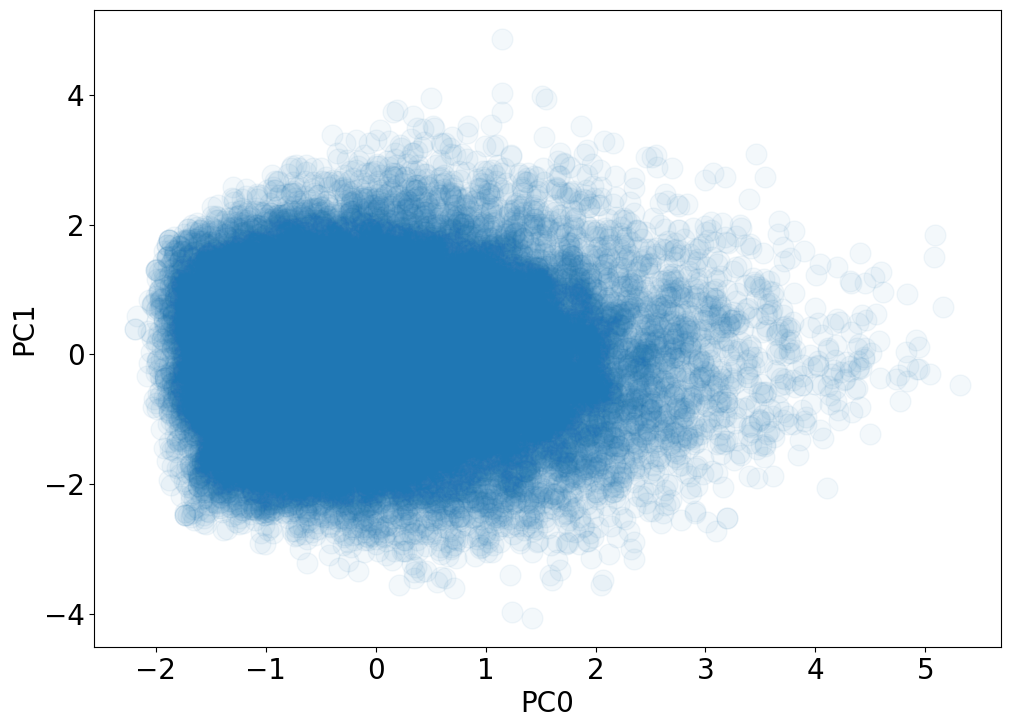

In [16]:
plt.scatter(x=df_pca['PC_0'], y=df_pca['PC_1'], alpha=0.05)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca['PC_0'], df_pca['PC_1'], df_pca['PC_2'], alpha=0.005)

# Write Data

In [18]:
col_names = df_pca.iloc[:,:num_comp].columns.tolist()
subset_drop = col_names + ['date']
df_pca_write = pd.concat([df_pca.iloc[:,:num_comp].copy(), df_pca_input], axis=1)
df_pca_write.dropna(subset=subset_drop, inplace=True)
df_pca_write.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47010 entries, 0 to 47009
Data columns (total 85 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   PC_0                                           47010 non-null  float64       
 1   PC_1                                           47010 non-null  float64       
 2   PC_2                                           47010 non-null  float64       
 3   PC_3                                           47010 non-null  float64       
 4   PC_4                                           47010 non-null  float64       
 5   gender                                         47010 non-null  int64         
 6   postnr                                         47010 non-null  int64         
 7   region                                         47010 non-null  object        
 8   Q1_1_feel_exposed                              47010 non

In [ ]:
#df_pca_write.to_csv('data/preprocessing/dim_reduction/pca_data.csv', index=False)

# Evaluate PCA Components

In [31]:
df_components.iloc[:,:num_comp]

,0,1,2,3,4
Q1_1_feel_exposed,0.081118,0.205267,0.094117,0.156723,0.069494
Q1_2_covid_is_threat,0.152455,0.139683,0.080592,0.154939,0.010369
Q2_1_easy_to_follow_advice,0.217205,0.139110,0.071607,0.110450,0.332228
Q2_2_can_follow_advice_if_wanted,0.178351,0.099391,0.162998,0.179046,0.400051
Q2_3_if_follow_advice_safe,0.232921,0.104600,0.179826,0.174547,0.201344
Q2_4_if_follow_advice_others_safe,0.195623,0.093809,0.159319,0.231575,0.304537
Q2_5_follow_advice_relationships_impared,0.061428,0.388792,0.409799,0.198471,0.130733
Q2_6_follow_advice_life_degraded,0.137173,0.363438,0.367140,0.131128,0.027332
Q3_1_aware_hand_hygiene,0.124100,0.089475,0.054446,0.077276,0.031352
Q3_2_avoid_contact,0.222404,0.185337,0.092293,0.181883,0.116821


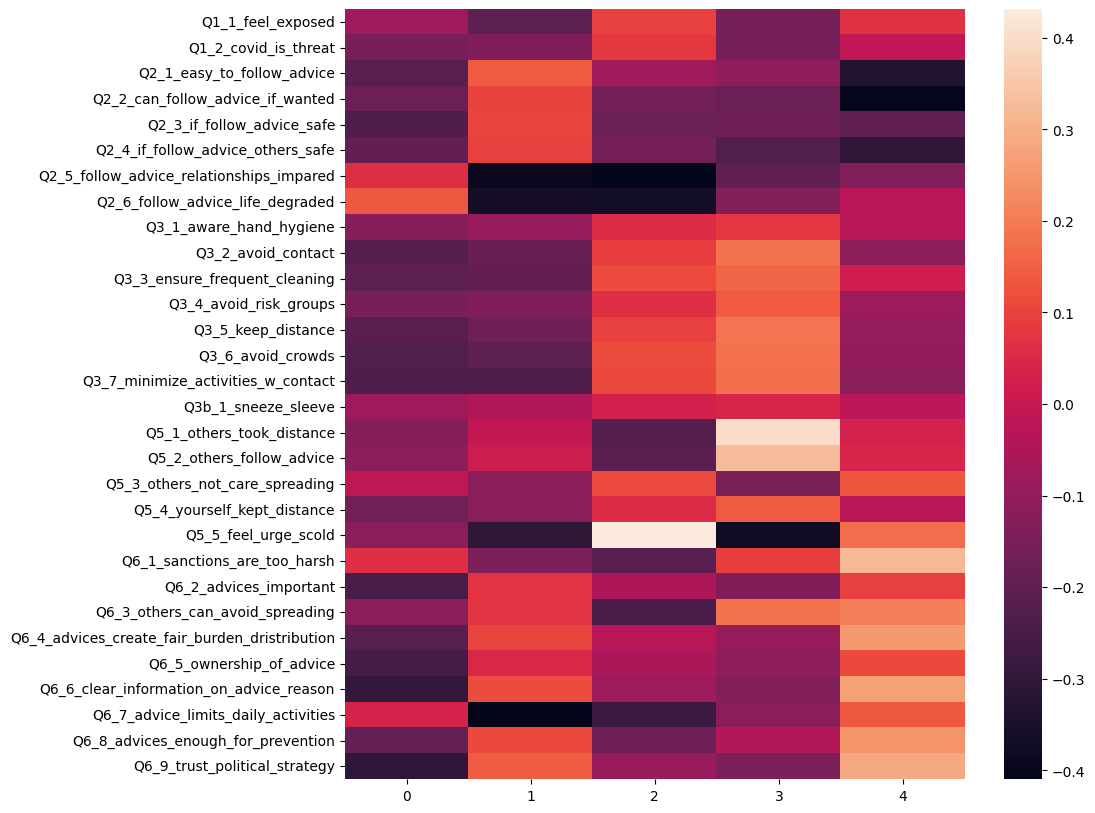

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
df_components = pd.DataFrame(pca.components_, columns=beh_cols).transpose()
#df_components = df_components.apply(lambda x: np.abs(x))
sns.heatmap(df_components.iloc[:,:num_comp], ax=ax)
plt.show()

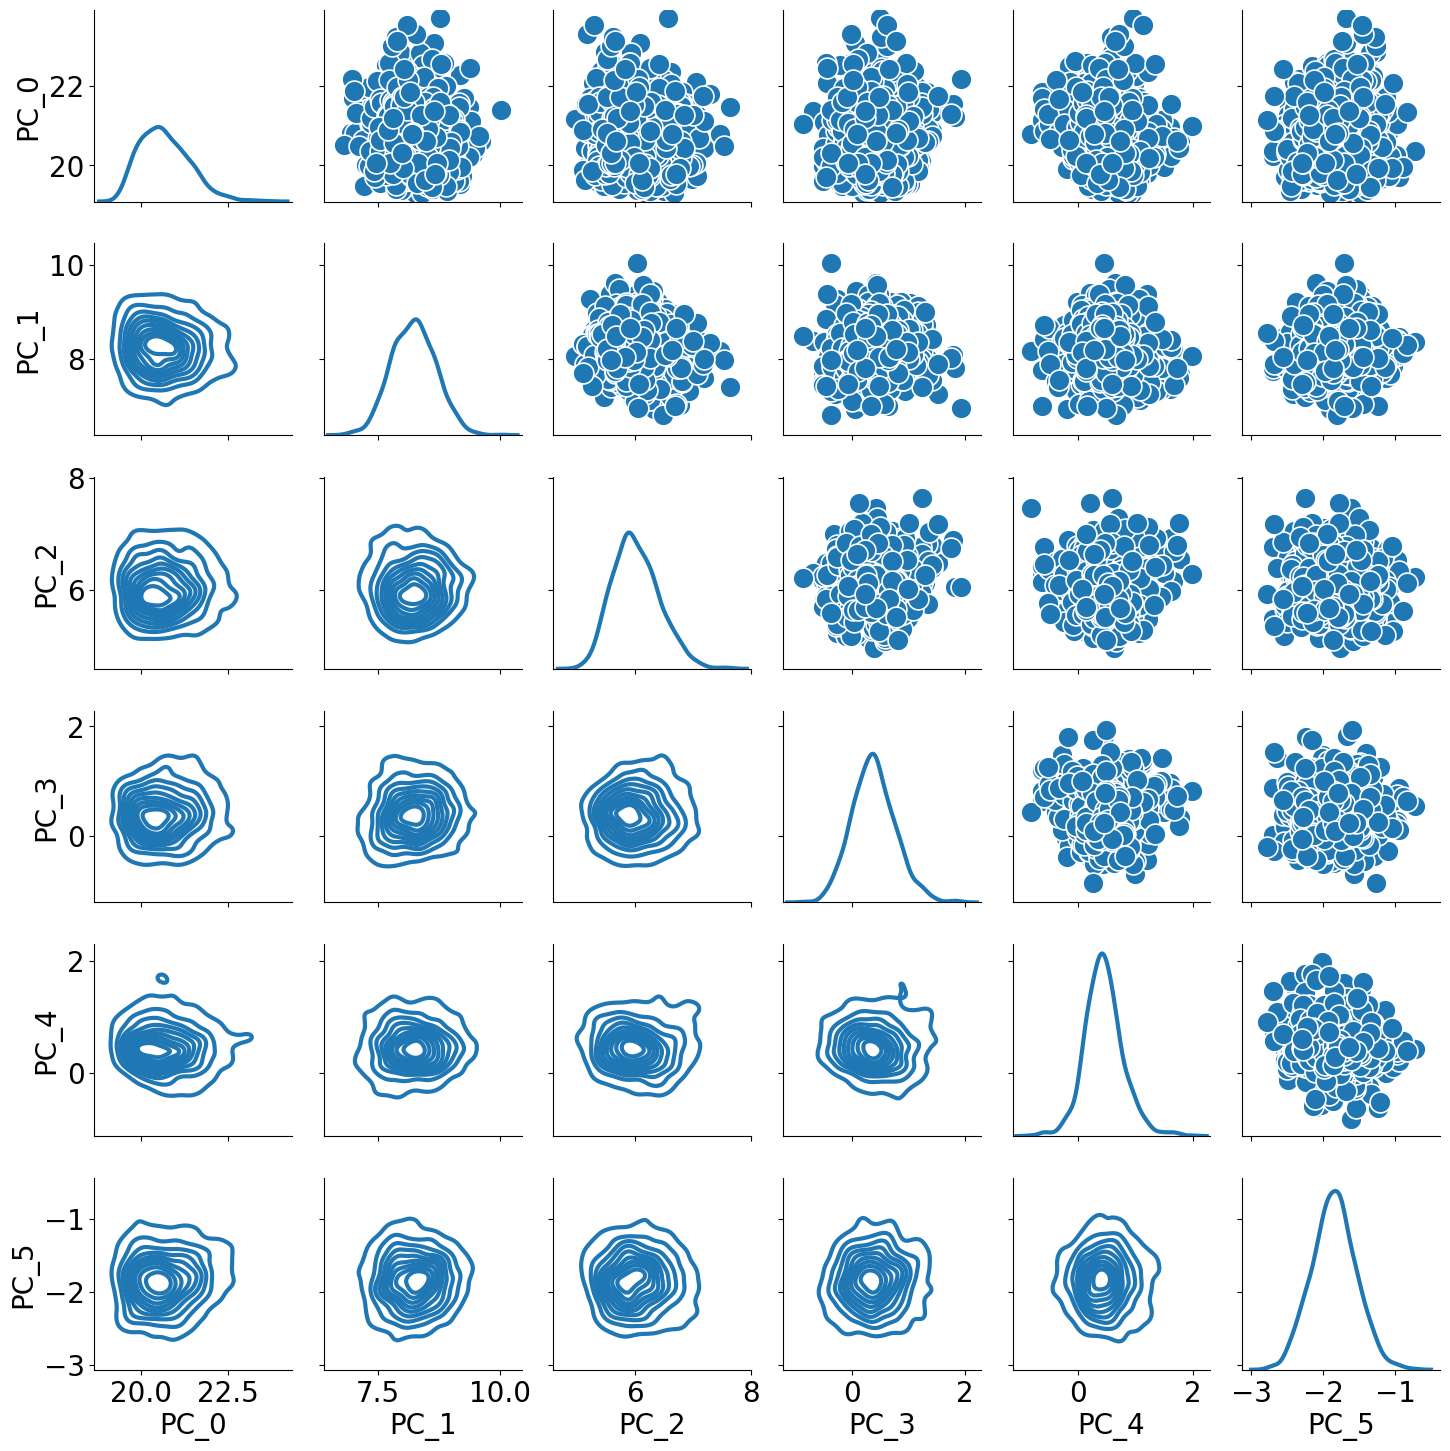

In [52]:
start = '2020-12-01'
end = '2020-12-07'
df_plot = df_pca_write.copy()
df_plot.date = pd.to_datetime(df_plot.date)
in_range = (df_plot.date > start) & (df_plot.date < end)
df_plot = df_plot[in_range]
df_plot = df_plot[col_names]
g = sns.PairGrid(data=df_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [ ]:
import plotly.express as px
df_lineplot = df_pca_write[subset_drop].groupby('date').mean().reset_index()
df_lineplot[col_names] = df_lineplot[col_names].rolling(3).mean()
px.line(df_lineplot, x='date', y=col_names)